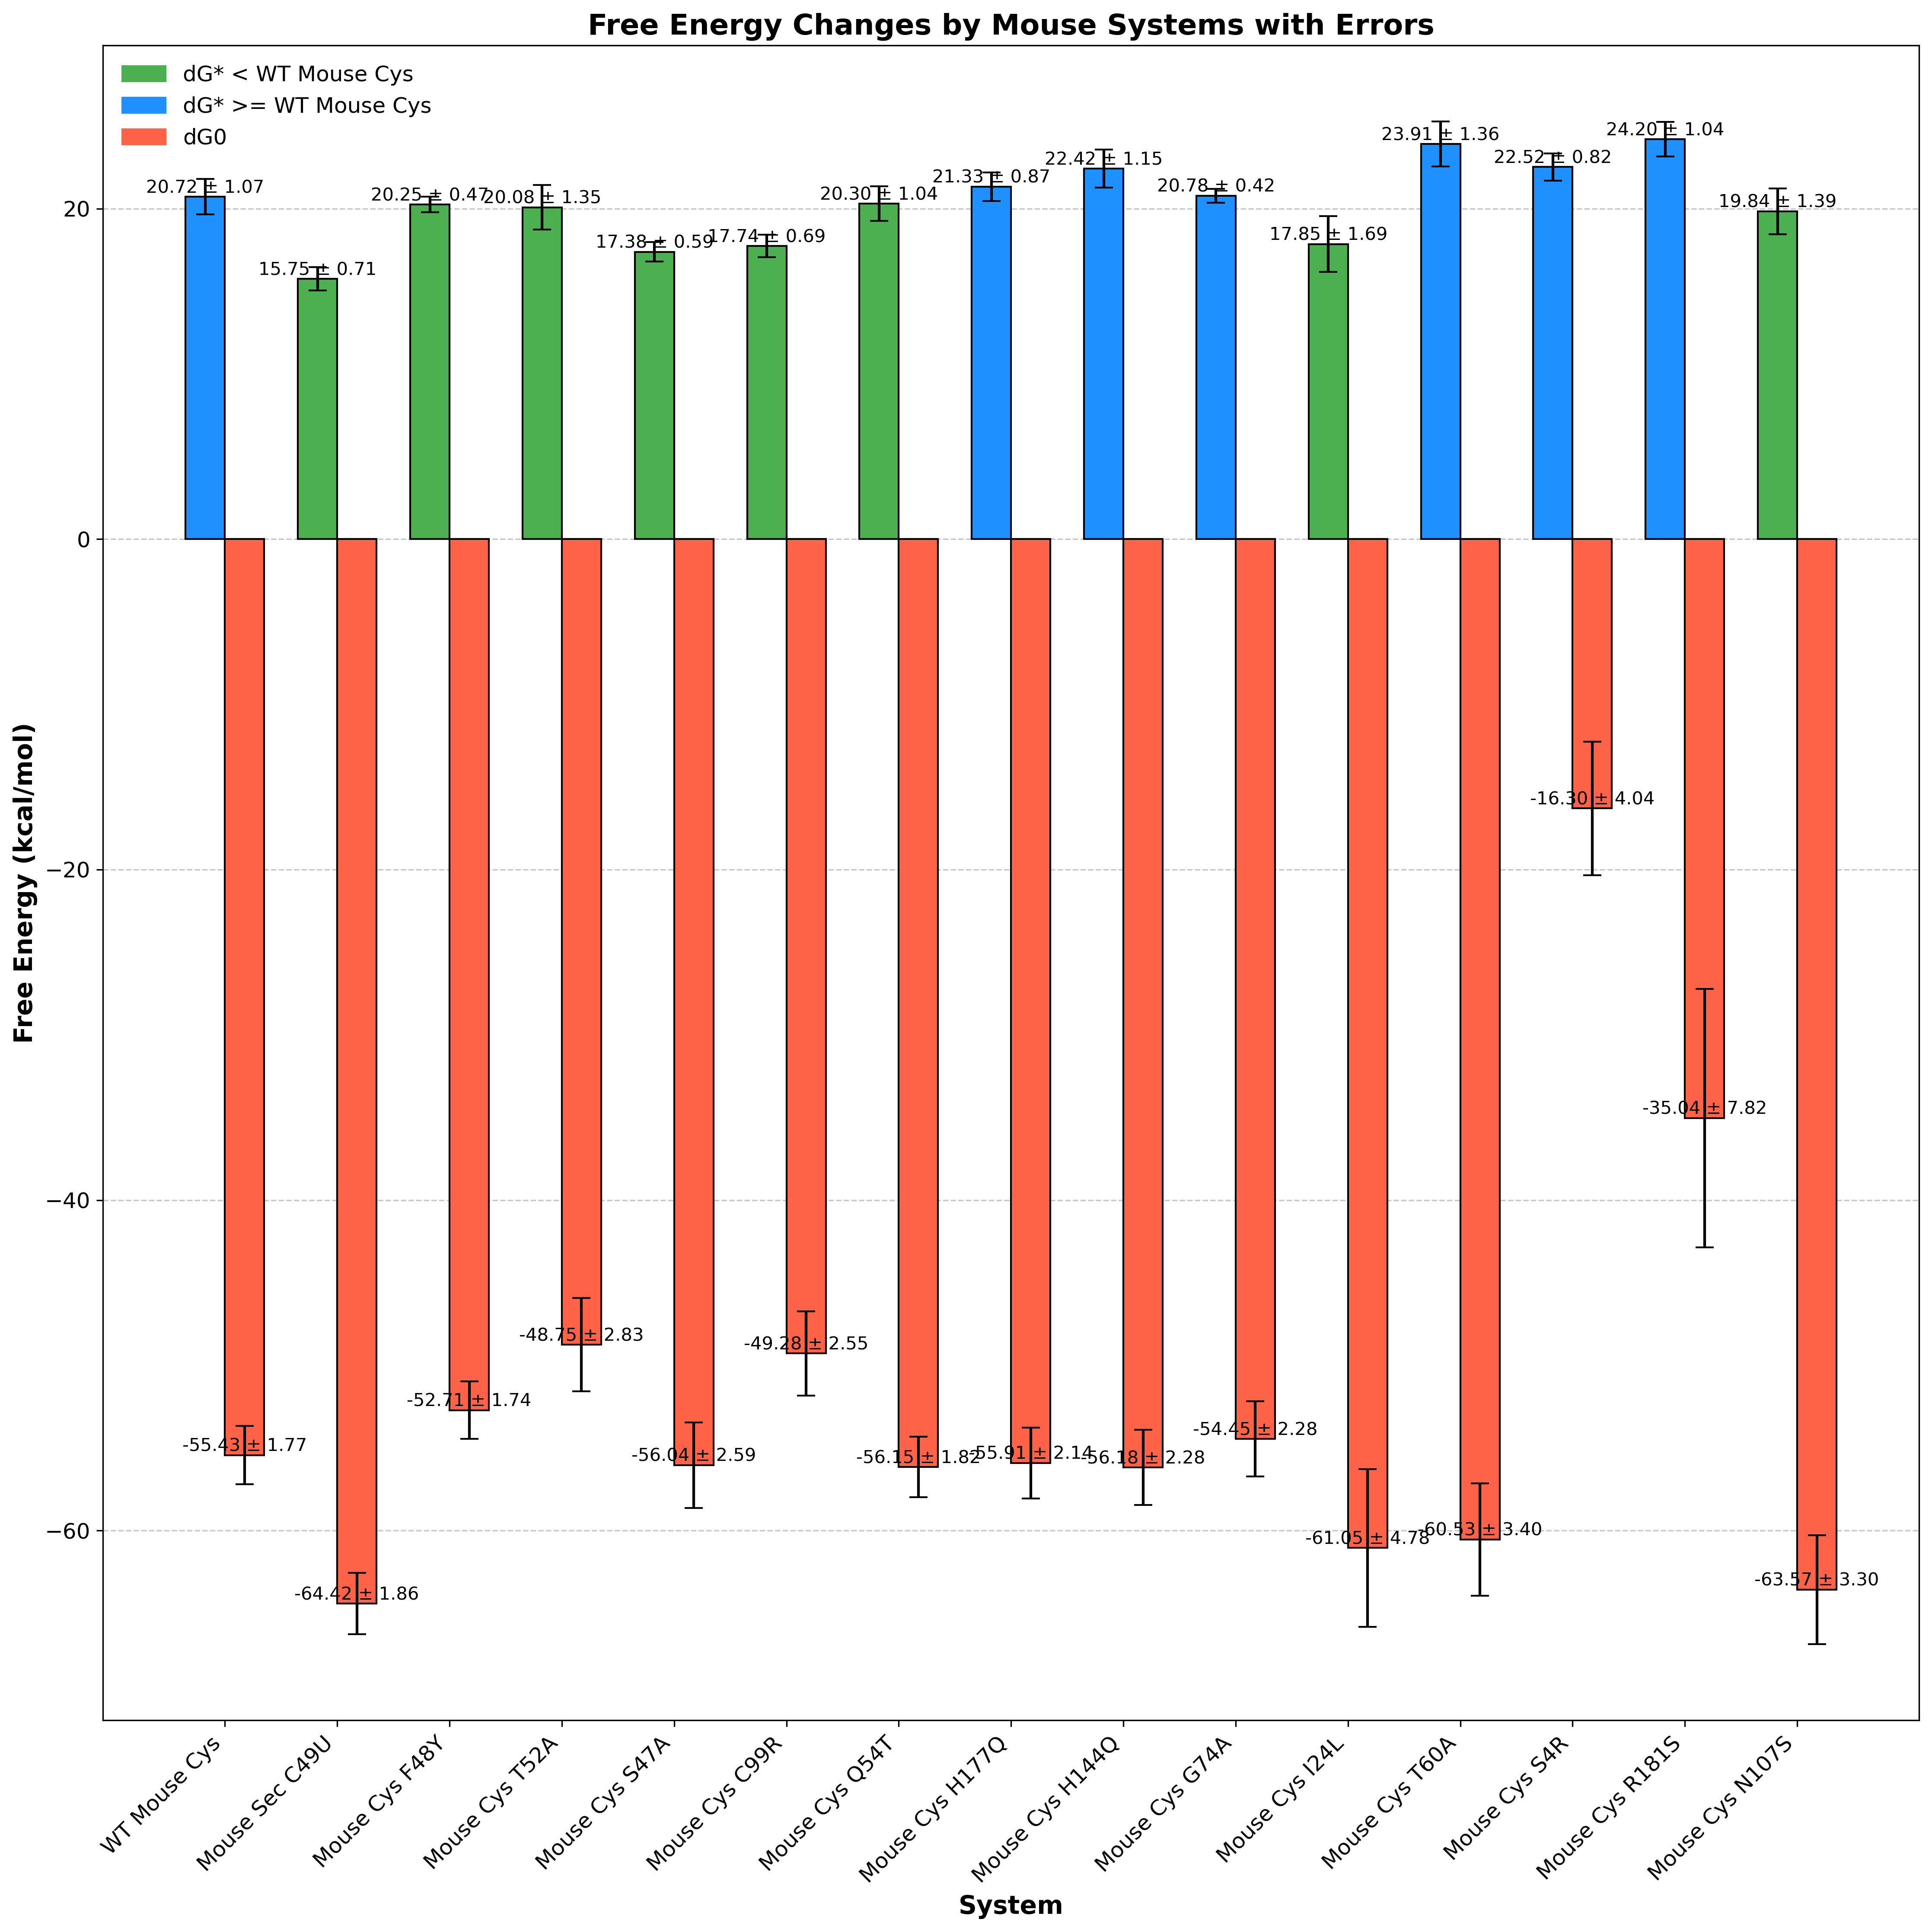

In [1]:
import re
import matplotlib.pyplot as plt
import numpy as np

# File path to the Free_Energy.tex file and save directory
file_path = '/home/hp/nayanika/github/GPX6/table/Free_Energy.tex'
save_path = '/home/hp/nayanika/github/GPX6/figures/Barplot_Mousecys.png'

# Regular expression to capture the data from the table, including errors
regex = re.compile(r'([A-Za-z0-9,\s\-]+) & ([0-9.]+)\s?\\pm\s?([0-9.]+) kcal/mol & ([0-9.\-]+)\s?\\pm\s?([0-9.]+) kcal/mol')

# Lists to store the extracted data
systems = []
dg_star_values = []
dg_star_errors = []
dg_zero_values = []
dg_zero_errors = []

# Read the .tex file and extract data for Mouse Cys and Mouse Sec only
with open(file_path, 'r') as f:
    for line in f:
        match = regex.search(line)
        if match:
            system_name = match.group(1).strip()
            if "Mouse Cys" in system_name or "Mouse Sec" in system_name:  # Filter for Mouse Cys and Mouse Sec entries
                systems.append(system_name)
                dg_star_values.append(float(match.group(2).strip()))
                dg_star_errors.append(float(match.group(3).strip()))
                dg_zero_values.append(float(match.group(4).strip()))
                dg_zero_errors.append(float(match.group(5).strip()))

# Ensure 'WT Mouse Cys' is found in the list
wt_mouse_cys_dg_star = None
for i, system in enumerate(systems):
    if "WT Mouse Cys" in system:
        wt_mouse_cys_dg_star = dg_star_values[i]
        break

if wt_mouse_cys_dg_star is None:
    raise ValueError("WT Mouse Cys dG* value not found in the table.")

# Threshold for low dG* values (set to WT Mouse Cys dG* value)
low_dg_star_threshold = wt_mouse_cys_dg_star

# Plotting the data with error bars
x = np.arange(len(systems))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 15), dpi=300)

# Color scheme: using green for values lower than the threshold and blue for equal or higher values
bar_colors_dg_star = ['#4CAF50' if val < low_dg_star_threshold else '#1E90FF' for val in dg_star_values]  # Green for low, Blue for normal
bar_colors_dg_zero = ['#FF6347'] * len(dg_zero_values)  # Constant color for dG0 (Tomato)

# Bar plot for dG* and dG0 with error bars
bars1 = ax.bar(x - width/2, dg_star_values, width, label='Mean dG* (kcal/mol)', color=bar_colors_dg_star, edgecolor='black', yerr=dg_star_errors, capsize=5)
bars2 = ax.bar(x + width/2, dg_zero_values, width, label='Mean dG0 (kcal/mol)', color=bar_colors_dg_zero, edgecolor='black', yerr=dg_zero_errors, capsize=5)

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('System', fontsize=14, fontweight='bold')
ax.set_ylabel('Free Energy (kcal/mol)', fontsize=14, fontweight='bold')
ax.set_title('Free Energy Changes by Mouse Systems with Errors', fontsize=16, fontweight='bold')

# X-axis tick formatting
ax.set_xticks(x)
ax.set_xticklabels(systems, rotation=45, ha="right", fontsize=10, fontweight='medium')

# Adding custom labels to each bar with both mean and error values
for i, rect in enumerate(bars1):
    height = rect.get_height()
    label_color = 'black'  # Always black for better contrast
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{dg_star_values[i]:.2f} ± {dg_star_errors[i]:.2f}', 
            ha='center', va='bottom', fontsize=10, color=label_color)

for i, rect in enumerate(bars2):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{dg_zero_values[i]:.2f} ± {dg_zero_errors[i]:.2f}', 
            ha='center', va='bottom', fontsize=10, color='black')

# Custom legend with simplified text
handles = [
    plt.Rectangle((0, 0), 1, 1, color='#4CAF50', label='dG* < WT Mouse Cys'),
    plt.Rectangle((0, 0), 1, 1, color='#1E90FF', label='dG* >= WT Mouse Cys'),
    plt.Rectangle((0, 0), 1, 1, color='#FF6347', label='dG0')
]
ax.legend(handles=handles, fontsize=12, frameon=False)

# Improve grid visibility and style
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

# Increase the size of tick labels
ax.tick_params(axis='both', which='major', labelsize=12)

# Tight layout for saving
plt.tight_layout()

plt.savefig(save_path, bbox_inches='tight', dpi=300)

# Show the plot (optional)
plt.show()


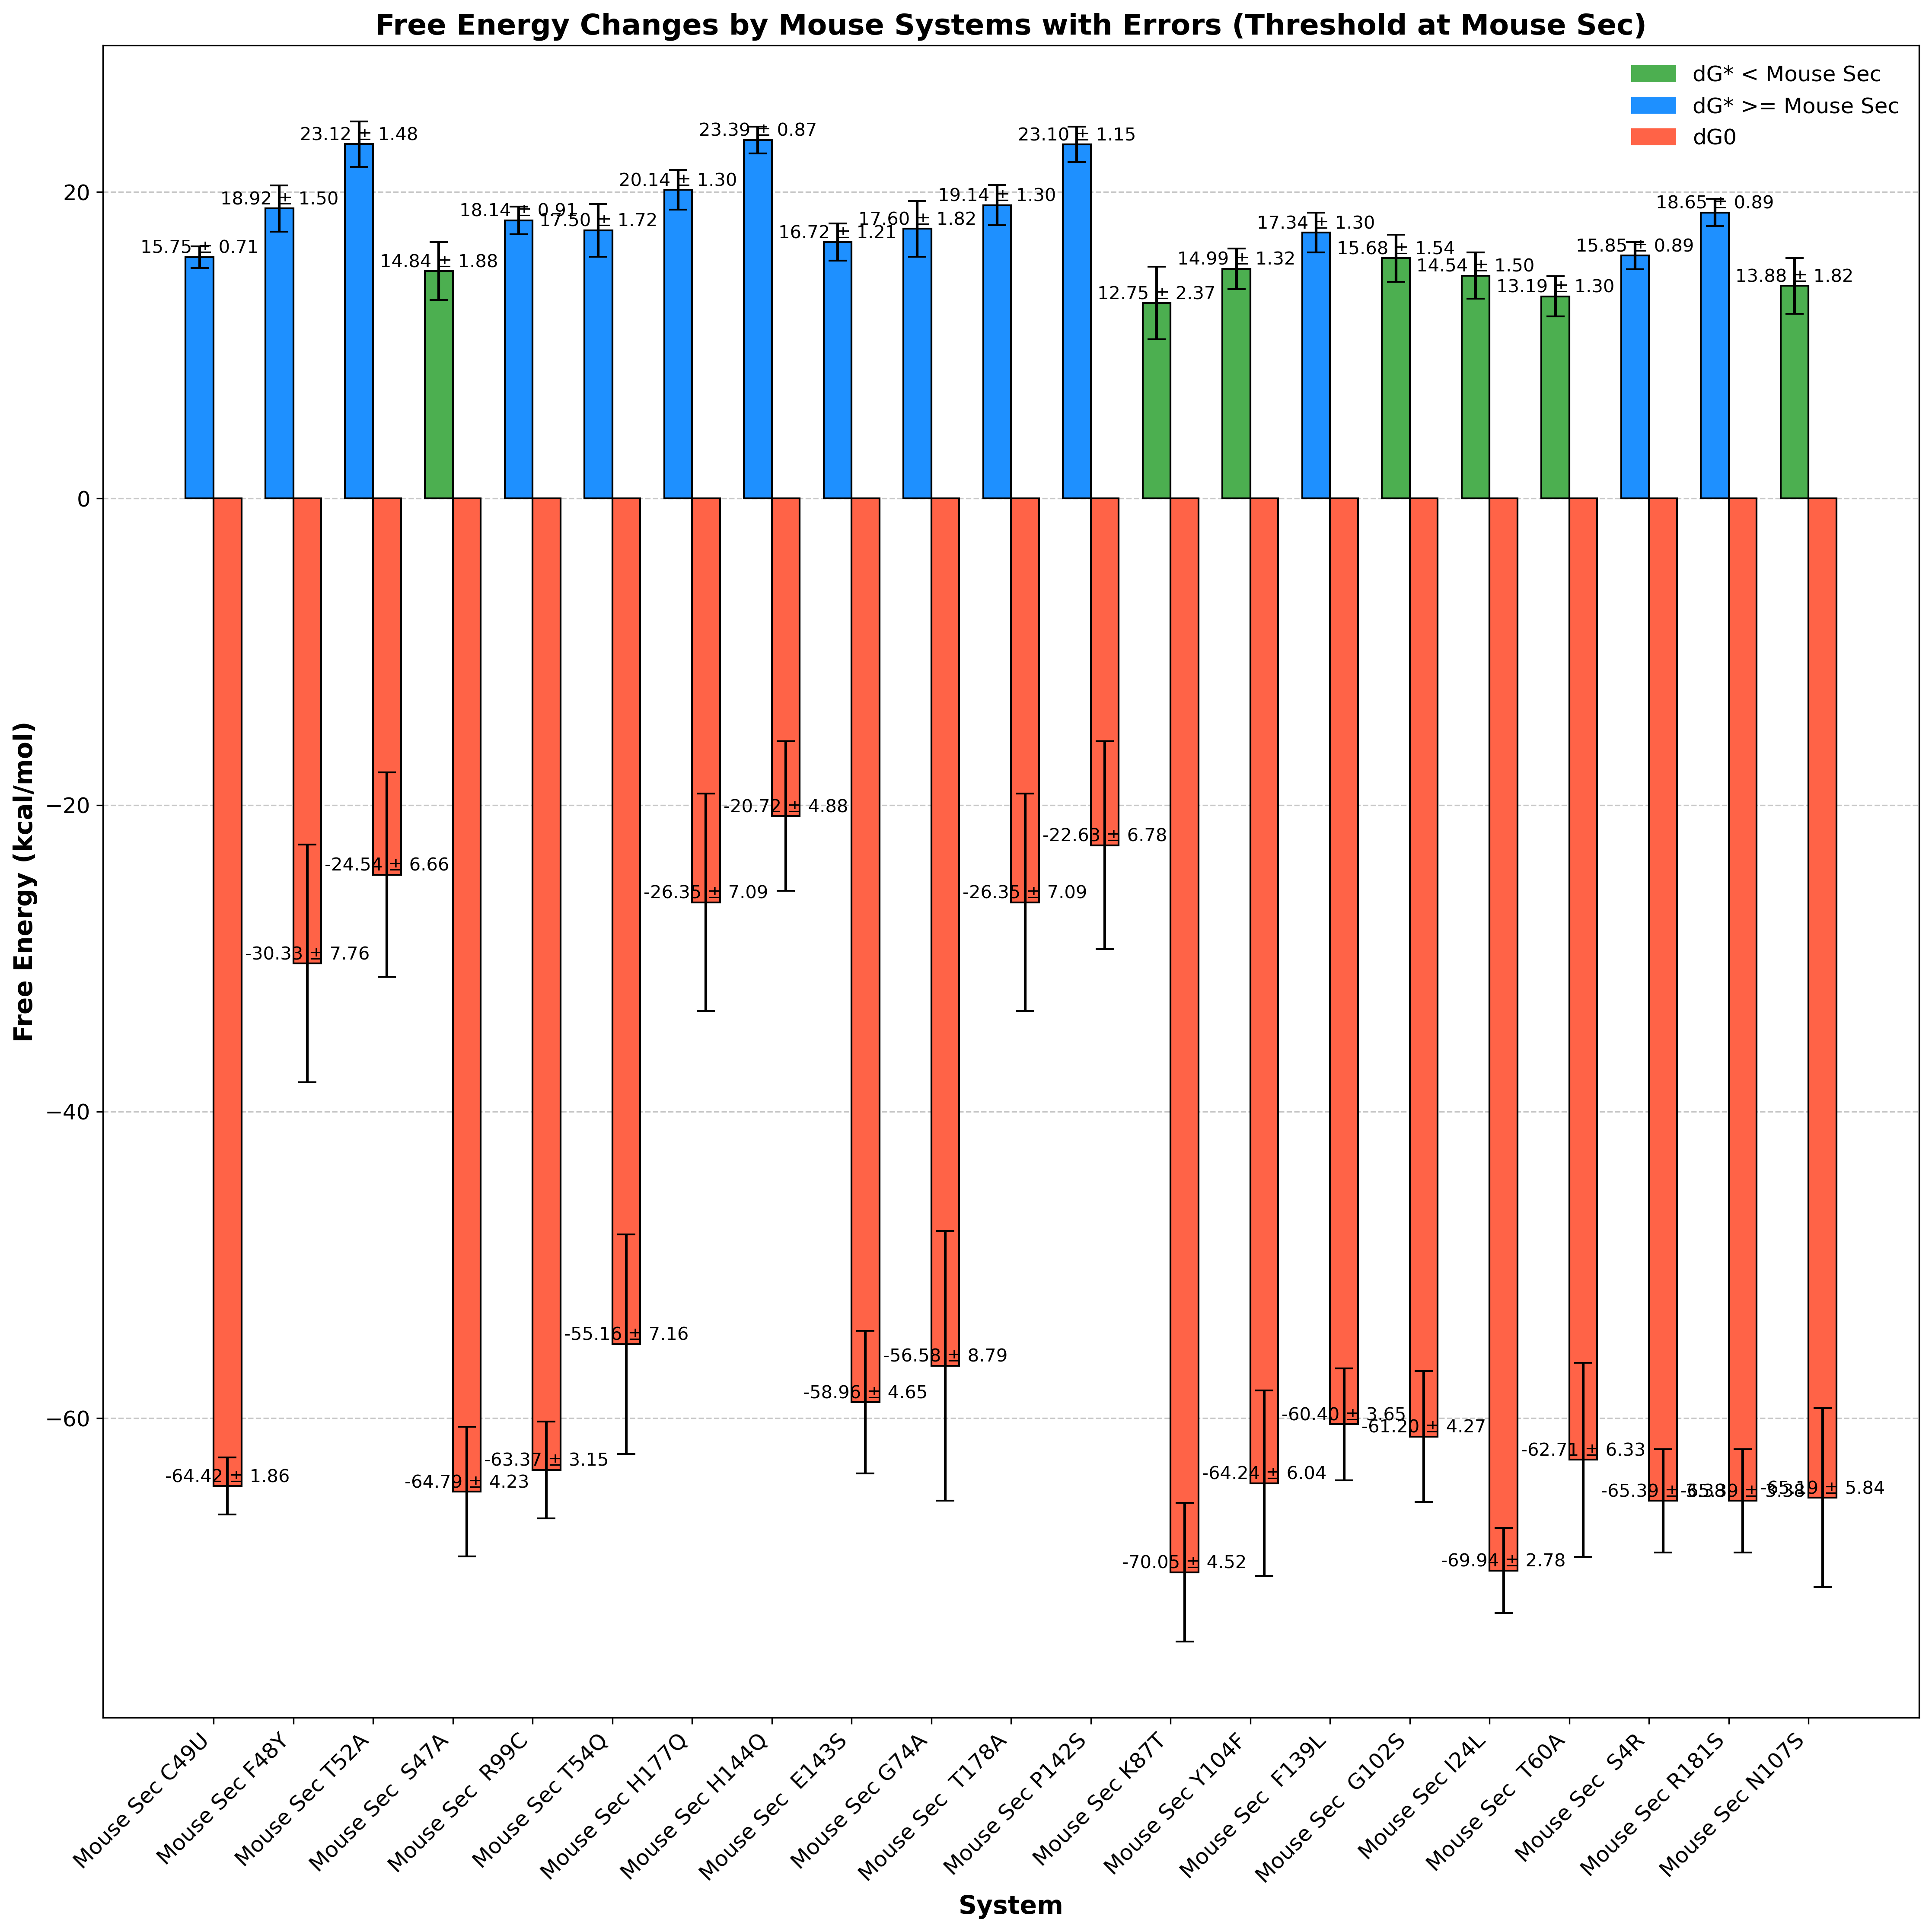

In [1]:
import re
import matplotlib.pyplot as plt
import numpy as np

# File path to the Free_Energy.tex file and save directory
file_path = '/home/hp/nayanika/github/GPX6/table/Free_Energy2.tex'
save_path = '/home/hp/nayanika/github/GPX6/figures/Barplot_Mousesec.png'

# Regular expression to capture the data from the table, including errors
regex = re.compile(r'([A-Za-z0-9,\s\-]+) & ([0-9.]+)\s?\\pm\s?([0-9.]+) kcal/mol & ([0-9.\-]+)\s?\\pm\s?([0-9.]+) kcal/mol')

# Lists to store the extracted data
systems = []
dg_star_values = []
dg_star_errors = []
dg_zero_values = []
dg_zero_errors = []

# Read the .tex file and extract data for Mouse Cys and Mouse Sec only
with open(file_path, 'r') as f:
    for line in f:
        match = regex.search(line)
        if match:
            system_name = match.group(1).strip()
            if "Mouse Cys" in system_name or "Mouse Sec" in system_name:  # Filter for Mouse Cys and Mouse Sec entries
                systems.append(system_name)
                dg_star_values.append(float(match.group(2).strip()))
                dg_star_errors.append(float(match.group(3).strip()))
                dg_zero_values.append(float(match.group(4).strip()))
                dg_zero_errors.append(float(match.group(5).strip()))

# Ensure 'Mouse Sec' is found in the list for threshold
mouse_sec_dg_star = None
for i, system in enumerate(systems):
    if "Mouse Sec" in system:
        mouse_sec_dg_star = dg_star_values[i]
        break

if mouse_sec_dg_star is None:
    raise ValueError("Mouse Sec dG* value not found in the table.")

# Threshold for high dG* values (set to Mouse Sec dG* value)
high_dg_star_threshold = mouse_sec_dg_star

# Plotting the data with error bars
x = np.arange(len(systems))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 15), dpi=300)

# Color scheme: using green for values lower than the threshold and red for equal or higher values
bar_colors_dg_star = ['#4CAF50' if val < high_dg_star_threshold else '#1E90FF' for val in dg_star_values]  # Green for low, Red for high
bar_colors_dg_zero = ['#FF6347'] * len(dg_zero_values)  # Constant color for dG0 (Tomato)

# Bar plot for dG* and dG0 with error bars
bars1 = ax.bar(x - width/2, dg_star_values, width, label='Mean dG* (kcal/mol)', color=bar_colors_dg_star, edgecolor='black', yerr=dg_star_errors, capsize=5)
bars2 = ax.bar(x + width/2, dg_zero_values, width, label='Mean dG0 (kcal/mol)', color=bar_colors_dg_zero, edgecolor='black', yerr=dg_zero_errors, capsize=5)

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('System', fontsize=14, fontweight='bold')
ax.set_ylabel('Free Energy (kcal/mol)', fontsize=14, fontweight='bold')
ax.set_title('Free Energy Changes by Mouse Systems with Errors (Threshold at Mouse Sec)', fontsize=16, fontweight='bold')

# X-axis tick formatting
ax.set_xticks(x)
ax.set_xticklabels(systems, rotation=45, ha="right", fontsize=10, fontweight='medium')

# Adding custom labels to each bar with both mean and error values
for i, rect in enumerate(bars1):
    height = rect.get_height()
    label_color = 'black'  # Always black for better contrast
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{dg_star_values[i]:.2f} ± {dg_star_errors[i]:.2f}', 
            ha='center', va='bottom', fontsize=10, color=label_color)

for i, rect in enumerate(bars2):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{dg_zero_values[i]:.2f} ± {dg_zero_errors[i]:.2f}', 
            ha='center', va='bottom', fontsize=10, color='black')

# Custom legend with simplified text
handles = [
    plt.Rectangle((0, 0), 1, 1, color='#4CAF50', label='dG* < Mouse Sec'),
    plt.Rectangle((0, 0), 1, 1, color='#1E90FF', label='dG* >= Mouse Sec'),
    plt.Rectangle((0, 0), 1, 1, color='#FF6347', label='dG0')
]
ax.legend(handles=handles, fontsize=12, frameon=False)

# Improve grid visibility and style
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

# Increase the size of tick labels
ax.tick_params(axis='both', which='major', labelsize=12)

# Tight layout for saving
plt.tight_layout()

# Save the plot
plt.savefig(save_path, bbox_inches='tight', dpi=300)

# Show the plot (optional)
plt.show()


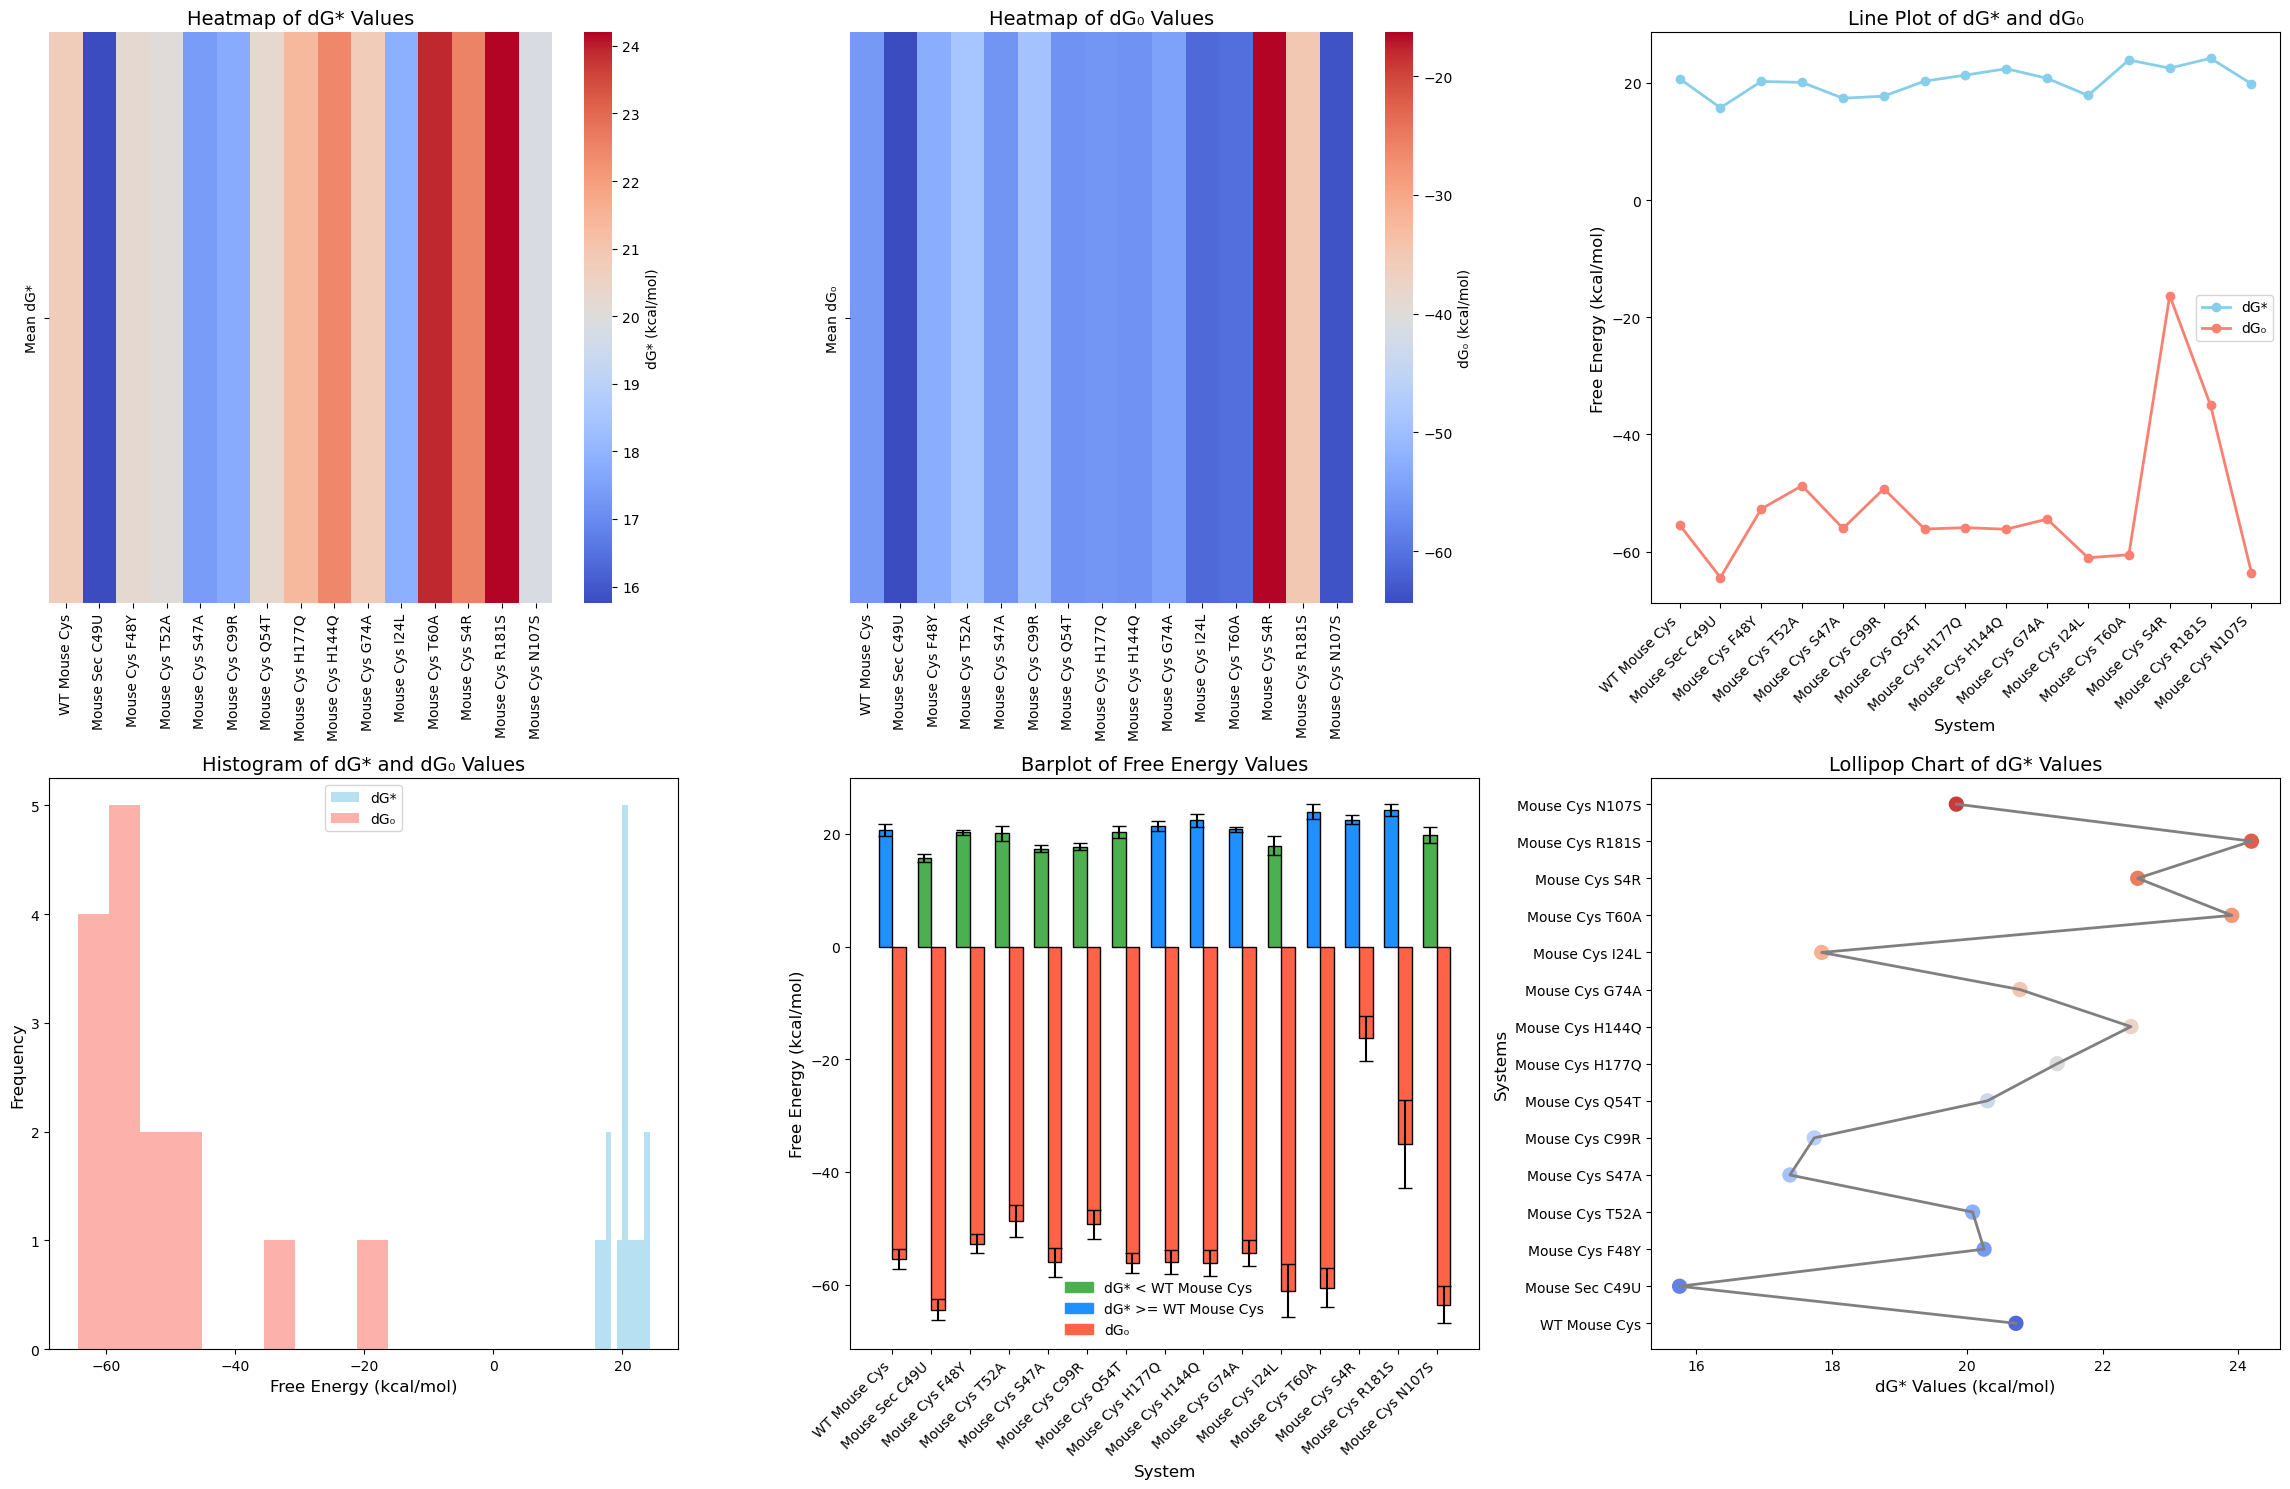

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data extracted from the Free_Energy.tex file
systems = ['WT Mouse Cys', 'Mouse Sec C49U', 'Mouse Cys F48Y', 'Mouse Cys T52A', 'Mouse Cys S47A', 
           'Mouse Cys C99R', 'Mouse Cys Q54T', 'Mouse Cys H177Q', 'Mouse Cys H144Q', 'Mouse Cys G74A', 
           'Mouse Cys I24L', 'Mouse Cys T60A', 'Mouse Cys S4R', 'Mouse Cys R181S', 'Mouse Cys N107S']
dg_star_values = [20.72, 15.75, 20.25, 20.08, 17.38, 17.74, 20.3, 21.33, 22.42, 20.78, 17.85, 23.91, 22.52, 24.2, 19.84]
dg_star_errors = [1.07, 0.71, 0.47, 1.35, 0.59, 0.69, 1.04, 0.87, 1.15, 0.42, 1.69, 1.36, 0.82, 1.04, 1.39]
dg_zero_values = [-55.43, -64.42, -52.71, -48.75, -56.04, -49.28, -56.15, -55.91, -56.18, -54.45, -61.05, -60.53, -16.3, -35.04, -63.57]
dg_zero_errors = [1.77, 1.86, 1.74, 2.83, 2.59, 2.55, 1.82, 2.14, 2.28, 2.28, 4.78, 3.4, 4.04, 7.82, 3.3]

# Threshold for low dG* values (set to WT Mouse Cys dG* value)
low_dg_star_threshold = dg_star_values[0]

# Create figure with subplots for all plots
fig, axs = plt.subplots(2, 3, figsize=(23, 15), dpi=100)

# --- Plot 1: Heatmap for dG* ---
heatmap_data_dg_star = np.array([dg_star_values])
sns.heatmap(
    heatmap_data_dg_star, 
    annot=False, fmt=".2f", cmap="coolwarm",  # Set annot=False to remove the values
    xticklabels=systems, 
    yticklabels=['Mean dG*'], 
    ax=axs[0, 0], cbar_kws={'label': 'dG* (kcal/mol)'}
)
axs[0, 0].set_title("Heatmap of dG* Values", fontsize=14)

# --- Plot 2: Heatmap for dG₀ ---
heatmap_data_dg_zero = np.array([dg_zero_values])
sns.heatmap(
    heatmap_data_dg_zero, 
    annot=False, fmt=".2f", cmap="coolwarm",  # Set annot=False to remove the values
    xticklabels=systems, 
    yticklabels=['Mean dG₀'], 
    ax=axs[0, 1], cbar_kws={'label': 'dG₀ (kcal/mol)'}
)
axs[0, 1].set_title("Heatmap of dG₀ Values", fontsize=14)

# --- Plot 3: Histogram for dG* and dG₀ ---
axs[1, 0].hist(dg_star_values, bins=10, alpha=0.6, label='dG*', color='skyblue')
axs[1, 0].hist(dg_zero_values, bins=10, alpha=0.6, label='dG₀', color='salmon')
axs[1, 0].set_title("Histogram of dG* and dG₀ Values", fontsize=14)
axs[1, 0].set_xlabel("Free Energy (kcal/mol)", fontsize=12)
axs[1, 0].set_ylabel("Frequency", fontsize=12)
axs[1, 0].legend()

# --- Plot 4: Barplot for dG* and dG₀ with error bars ---
x = np.arange(len(systems))  # the label locations
width = 0.35

bar_colors_dg_star = ['#4CAF50' if val < low_dg_star_threshold else '#1E90FF' for val in dg_star_values]
bar_colors_dg_zero = ['#FF6347'] * len(dg_zero_values)

bars1 = axs[1, 1].bar(x - width/2, dg_star_values, width, label='Mean dG*', color=bar_colors_dg_star, edgecolor='black', yerr=dg_star_errors, capsize=5)
bars2 = axs[1, 1].bar(x + width/2, dg_zero_values, width, label='Mean dG₀', color=bar_colors_dg_zero, edgecolor='black', yerr=dg_zero_errors, capsize=5)

axs[1, 1].set_xlabel("System", fontsize=12)
axs[1, 1].set_ylabel("Free Energy (kcal/mol)", fontsize=12)
axs[1, 1].set_title("Barplot of Free Energy Values", fontsize=14)
axs[1, 1].set_xticks(x)
axs[1, 1].set_xticklabels(systems, rotation=45, ha="right", fontsize=10)

handles = [
    plt.Rectangle((0, 0), 1, 1, color='#4CAF50', label='dG* < WT Mouse Cys'),
    plt.Rectangle((0, 0), 1, 1, color='#1E90FF', label='dG* >= WT Mouse Cys'),
    plt.Rectangle((0, 0), 1, 1, color='#FF6347', label='dG₀')
]
axs[1, 1].legend(handles=handles, fontsize=10, frameon=False)

# --- Plot 5: Lollipop Chart for dG* values ---
axs[1, 2].scatter(dg_star_values, systems, color=sns.color_palette("coolwarm", len(systems)), s=100, label="dG*")
axs[1, 2].plot(dg_star_values, systems, color="gray", linewidth=2)  # Line connecting points
axs[1, 2].set_title("Lollipop Chart of dG* Values", fontsize=14)
axs[1, 2].set_xlabel("dG* Values (kcal/mol)", fontsize=12)
axs[1, 2].set_ylabel("Systems", fontsize=12)

# --- Plot 6: Line plot for dG* and dG₀ ---
axs[0, 2].plot(systems, dg_star_values, label="dG*", color="skyblue", marker='o', linestyle='-', linewidth=2)
axs[0, 2].plot(systems, dg_zero_values, label="dG₀", color="salmon", marker='o', linestyle='-', linewidth=2)
axs[0, 2].set_xlabel("System", fontsize=12)
axs[0, 2].set_ylabel("Free Energy (kcal/mol)", fontsize=12)
axs[0, 2].set_title("Line Plot of dG* and dG₀", fontsize=14)
axs[0, 2].legend(fontsize=10)
axs[0, 2].set_xticks(range(len(systems)))
axs[0, 2].set_xticklabels(systems, rotation=45, ha="right", fontsize=10)

# Adjust layout and show plots
plt.tight_layout()
plt.show()


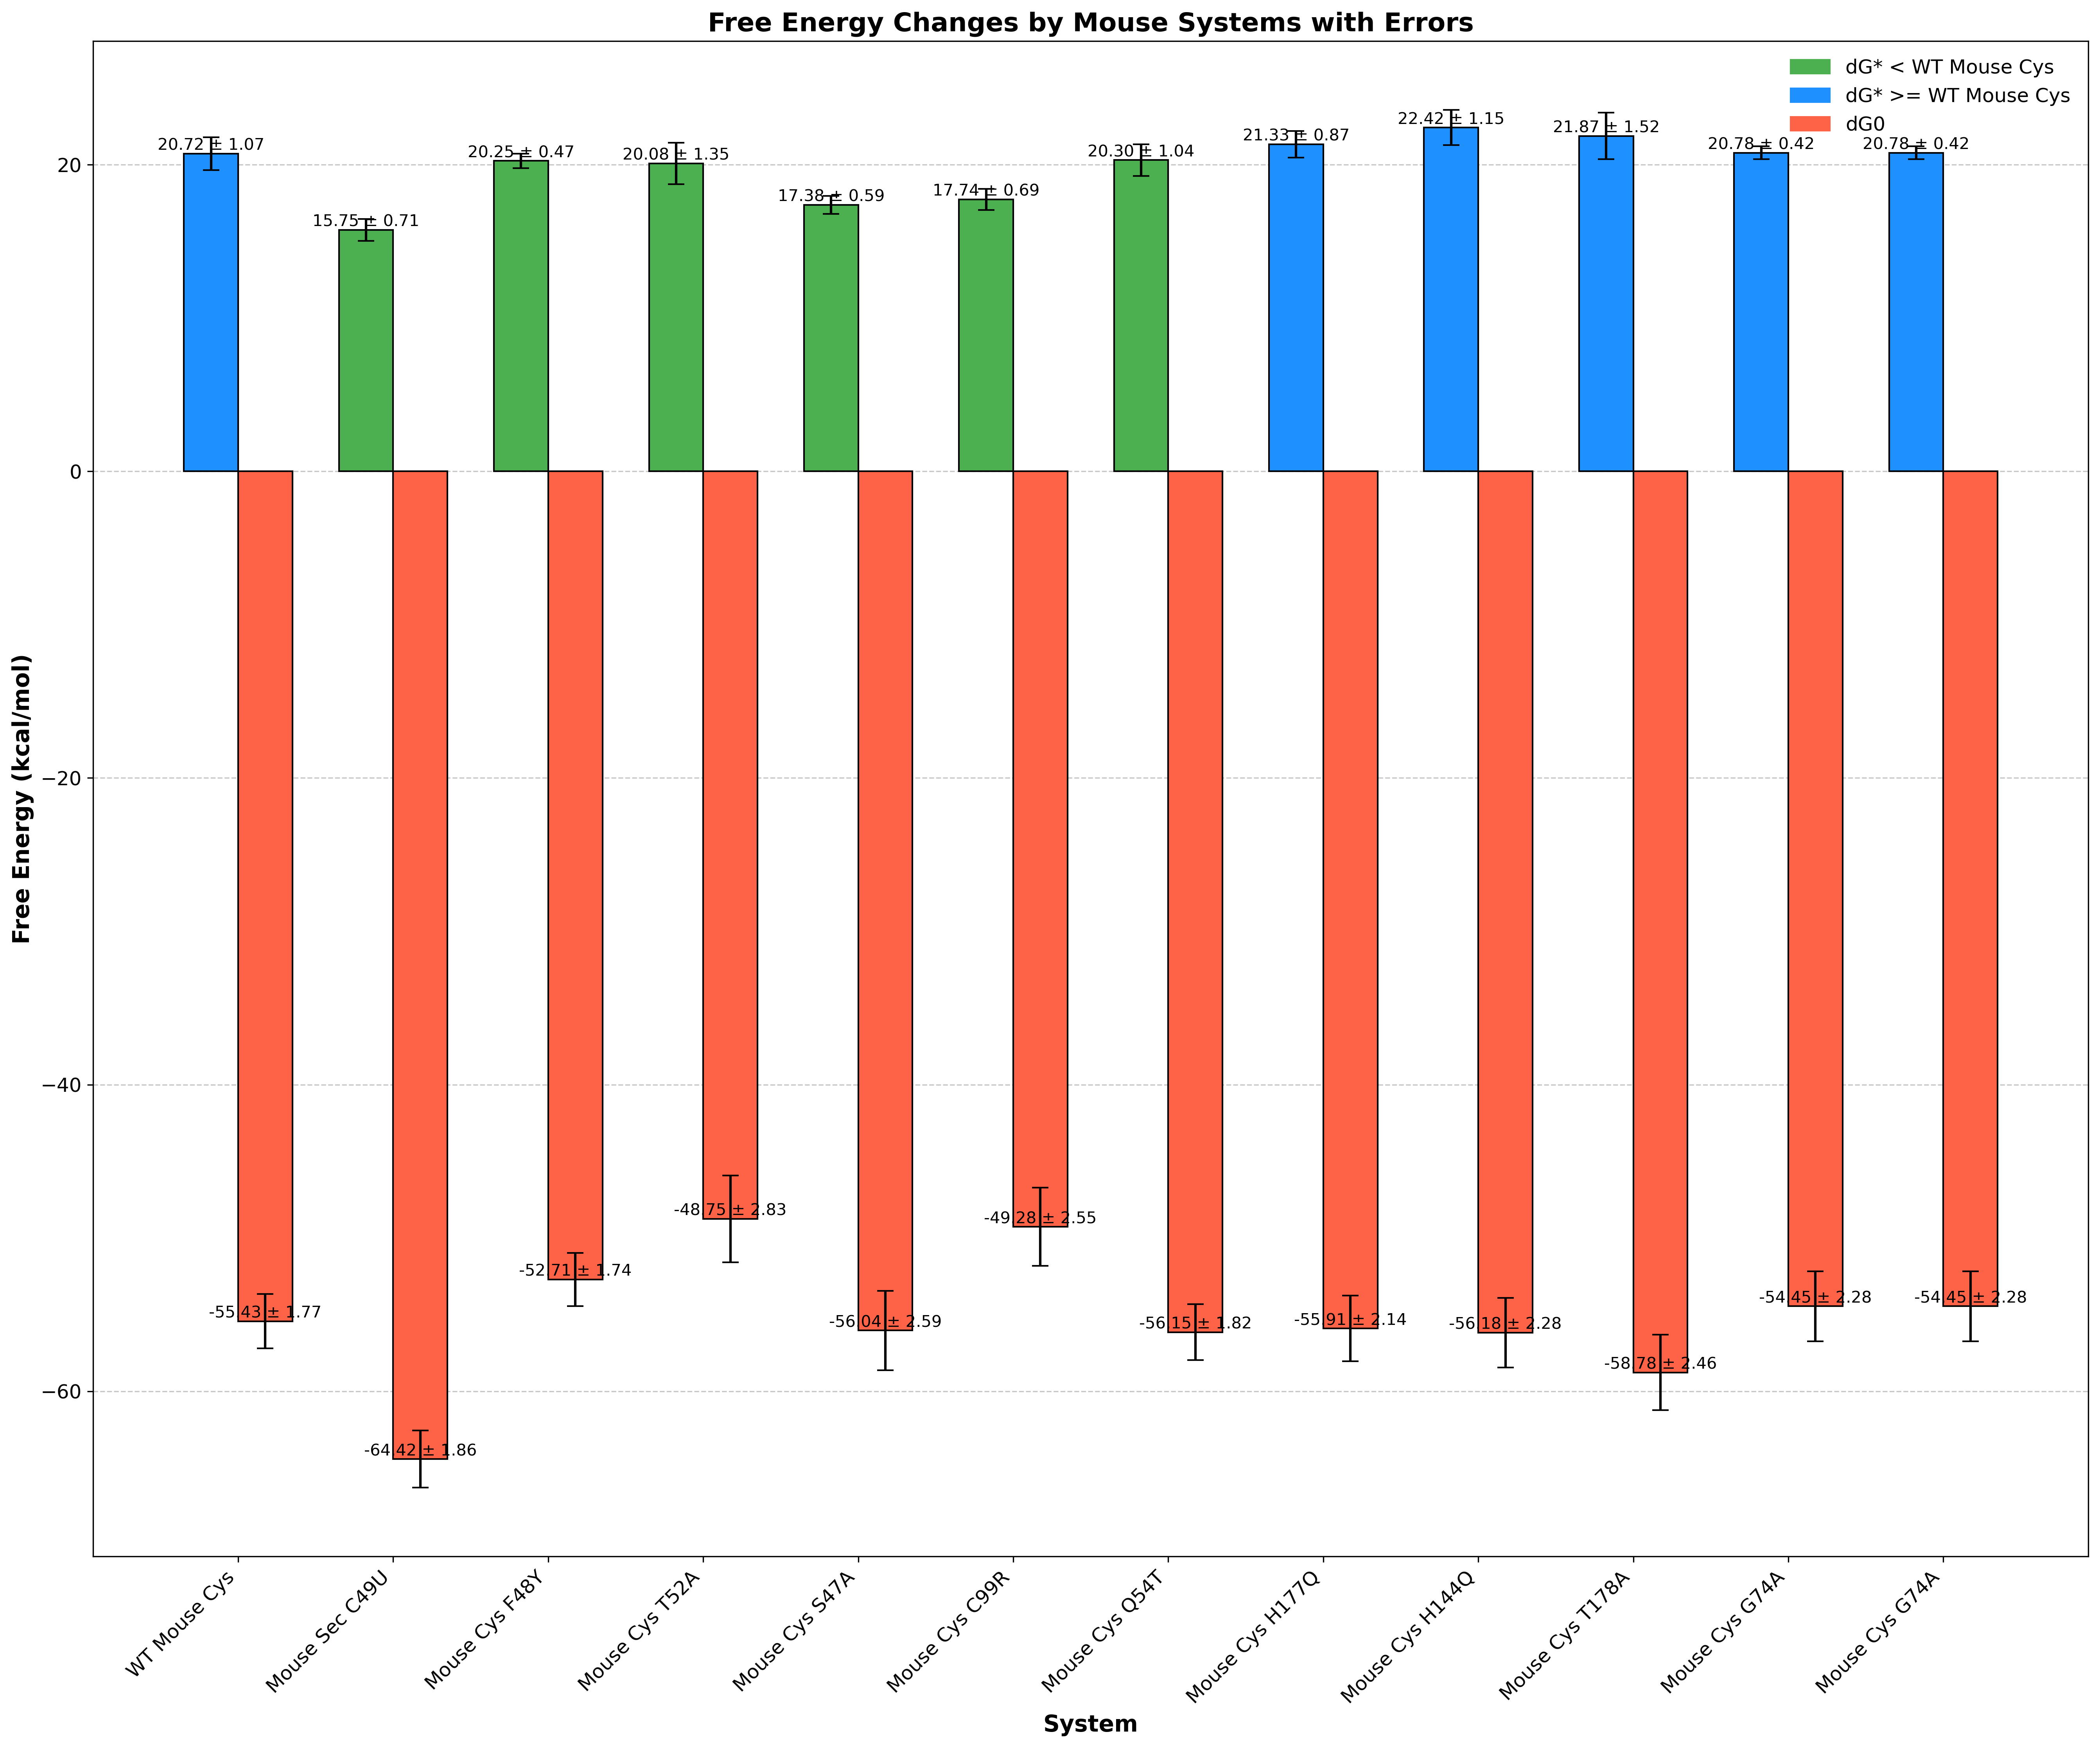

In [2]:
import re
import matplotlib.pyplot as plt
import numpy as np

# File path to the Free_Energy.tex file and save directory
file_path = '/home/hp/nayanika/github/GPX6/table/Free_Energy.tex'
save_path = '/home/hp/nayanika/github/GPX6/figures/Free_Energy_BarPlot_with_Errors_Mouse.png'

# Regular expression to capture the data from the table, including errors
regex = re.compile(r'([A-Za-z0-9,\s\-]+) & ([0-9.]+)\s?\\pm\s?([0-9.]+) kcal/mol & ([0-9.\-]+)\s?\\pm\s?([0-9.]+) kcal/mol')

# Lists to store the extracted data
systems = []
dg_star_values = []
dg_star_errors = []
dg_zero_values = []
dg_zero_errors = []

# Read the .tex file and extract data
with open(file_path, 'r') as f:
    for line in f:
        match = regex.search(line)
        if match:
            system_name = match.group(1).strip()
            if "Mouse" in system_name:  # Filter for Mouse entries
                systems.append(system_name)
                dg_star_values.append(float(match.group(2).strip()))
                dg_star_errors.append(float(match.group(3).strip()))
                dg_zero_values.append(float(match.group(4).strip()))
                dg_zero_errors.append(float(match.group(5).strip()))

# Ensure 'WT Mouse Cys' is found in the list
wt_mouse_cys_dg_star = None
for i, system in enumerate(systems):
    if "WT Mouse Cys" in system:
        wt_mouse_cys_dg_star = dg_star_values[i]
        break

if wt_mouse_cys_dg_star is None:
    raise ValueError("WT Mouse Cys dG* value not found in the table.")

# Threshold for low dG* values (set to WT Mouse Cys dG* value)
low_dg_star_threshold = wt_mouse_cys_dg_star

# Plotting the data with error bars
x = np.arange(len(systems))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(18, 15), dpi=300)  

# Color scheme: using green for values lower than the threshold and blue for equal or higher values
bar_colors_dg_star = ['#4CAF50' if val < low_dg_star_threshold else '#1E90FF' for val in dg_star_values]  # Green for low, Blue for normal
bar_colors_dg_zero = ['#FF6347'] * len(dg_zero_values)  # Constant color for dG0 (Tomato)

# Bar plot for dG* and dG0 with error bars
bars1 = ax.bar(x - width/2, dg_star_values, width, label='Mean dG* (kcal/mol)', color=bar_colors_dg_star, edgecolor='black', yerr=dg_star_errors, capsize=5)
bars2 = ax.bar(x + width/2, dg_zero_values, width, label='Mean dG0 (kcal/mol)', color=bar_colors_dg_zero, edgecolor='black', yerr=dg_zero_errors, capsize=5)

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('System', fontsize=14, fontweight='bold')
ax.set_ylabel('Free Energy (kcal/mol)', fontsize=14, fontweight='bold')
ax.set_title('Free Energy Changes by Mouse Systems with Errors', fontsize=16, fontweight='bold')

# X-axis tick formatting
ax.set_xticks(x)
ax.set_xticklabels(systems, rotation=45, ha="right", fontsize=10, fontweight='medium')

# Adding custom labels to each bar with both mean and error values
for i, rect in enumerate(bars1):
    height = rect.get_height()
    label_color = 'black'  # Always black for better contrast
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{dg_star_values[i]:.2f} ± {dg_star_errors[i]:.2f}', 
            ha='center', va='bottom', fontsize=10, color=label_color)

for i, rect in enumerate(bars2):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{dg_zero_values[i]:.2f} ± {dg_zero_errors[i]:.2f}', 
            ha='center', va='bottom', fontsize=10, color='black')

# Custom legend with simplified text
handles = [
    plt.Rectangle((0, 0), 1, 1, color='#4CAF50', label='dG* < WT Mouse Cys'),
    plt.Rectangle((0, 0), 1, 1, color='#1E90FF', label='dG* >= WT Mouse Cys'),
    plt.Rectangle((0, 0), 1, 1, color='#FF6347', label='dG0')
]
ax.legend(handles=handles, fontsize=12, frameon=False)

# Improve grid visibility and style
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

# Increase the size of tick labels
ax.tick_params(axis='both', which='major', labelsize=12)

# Tight layout for saving
plt.tight_layout()

# Save the figure
plt.savefig(save_path, bbox_inches='tight', dpi=300)

# Show the plot (optional)
plt.show()


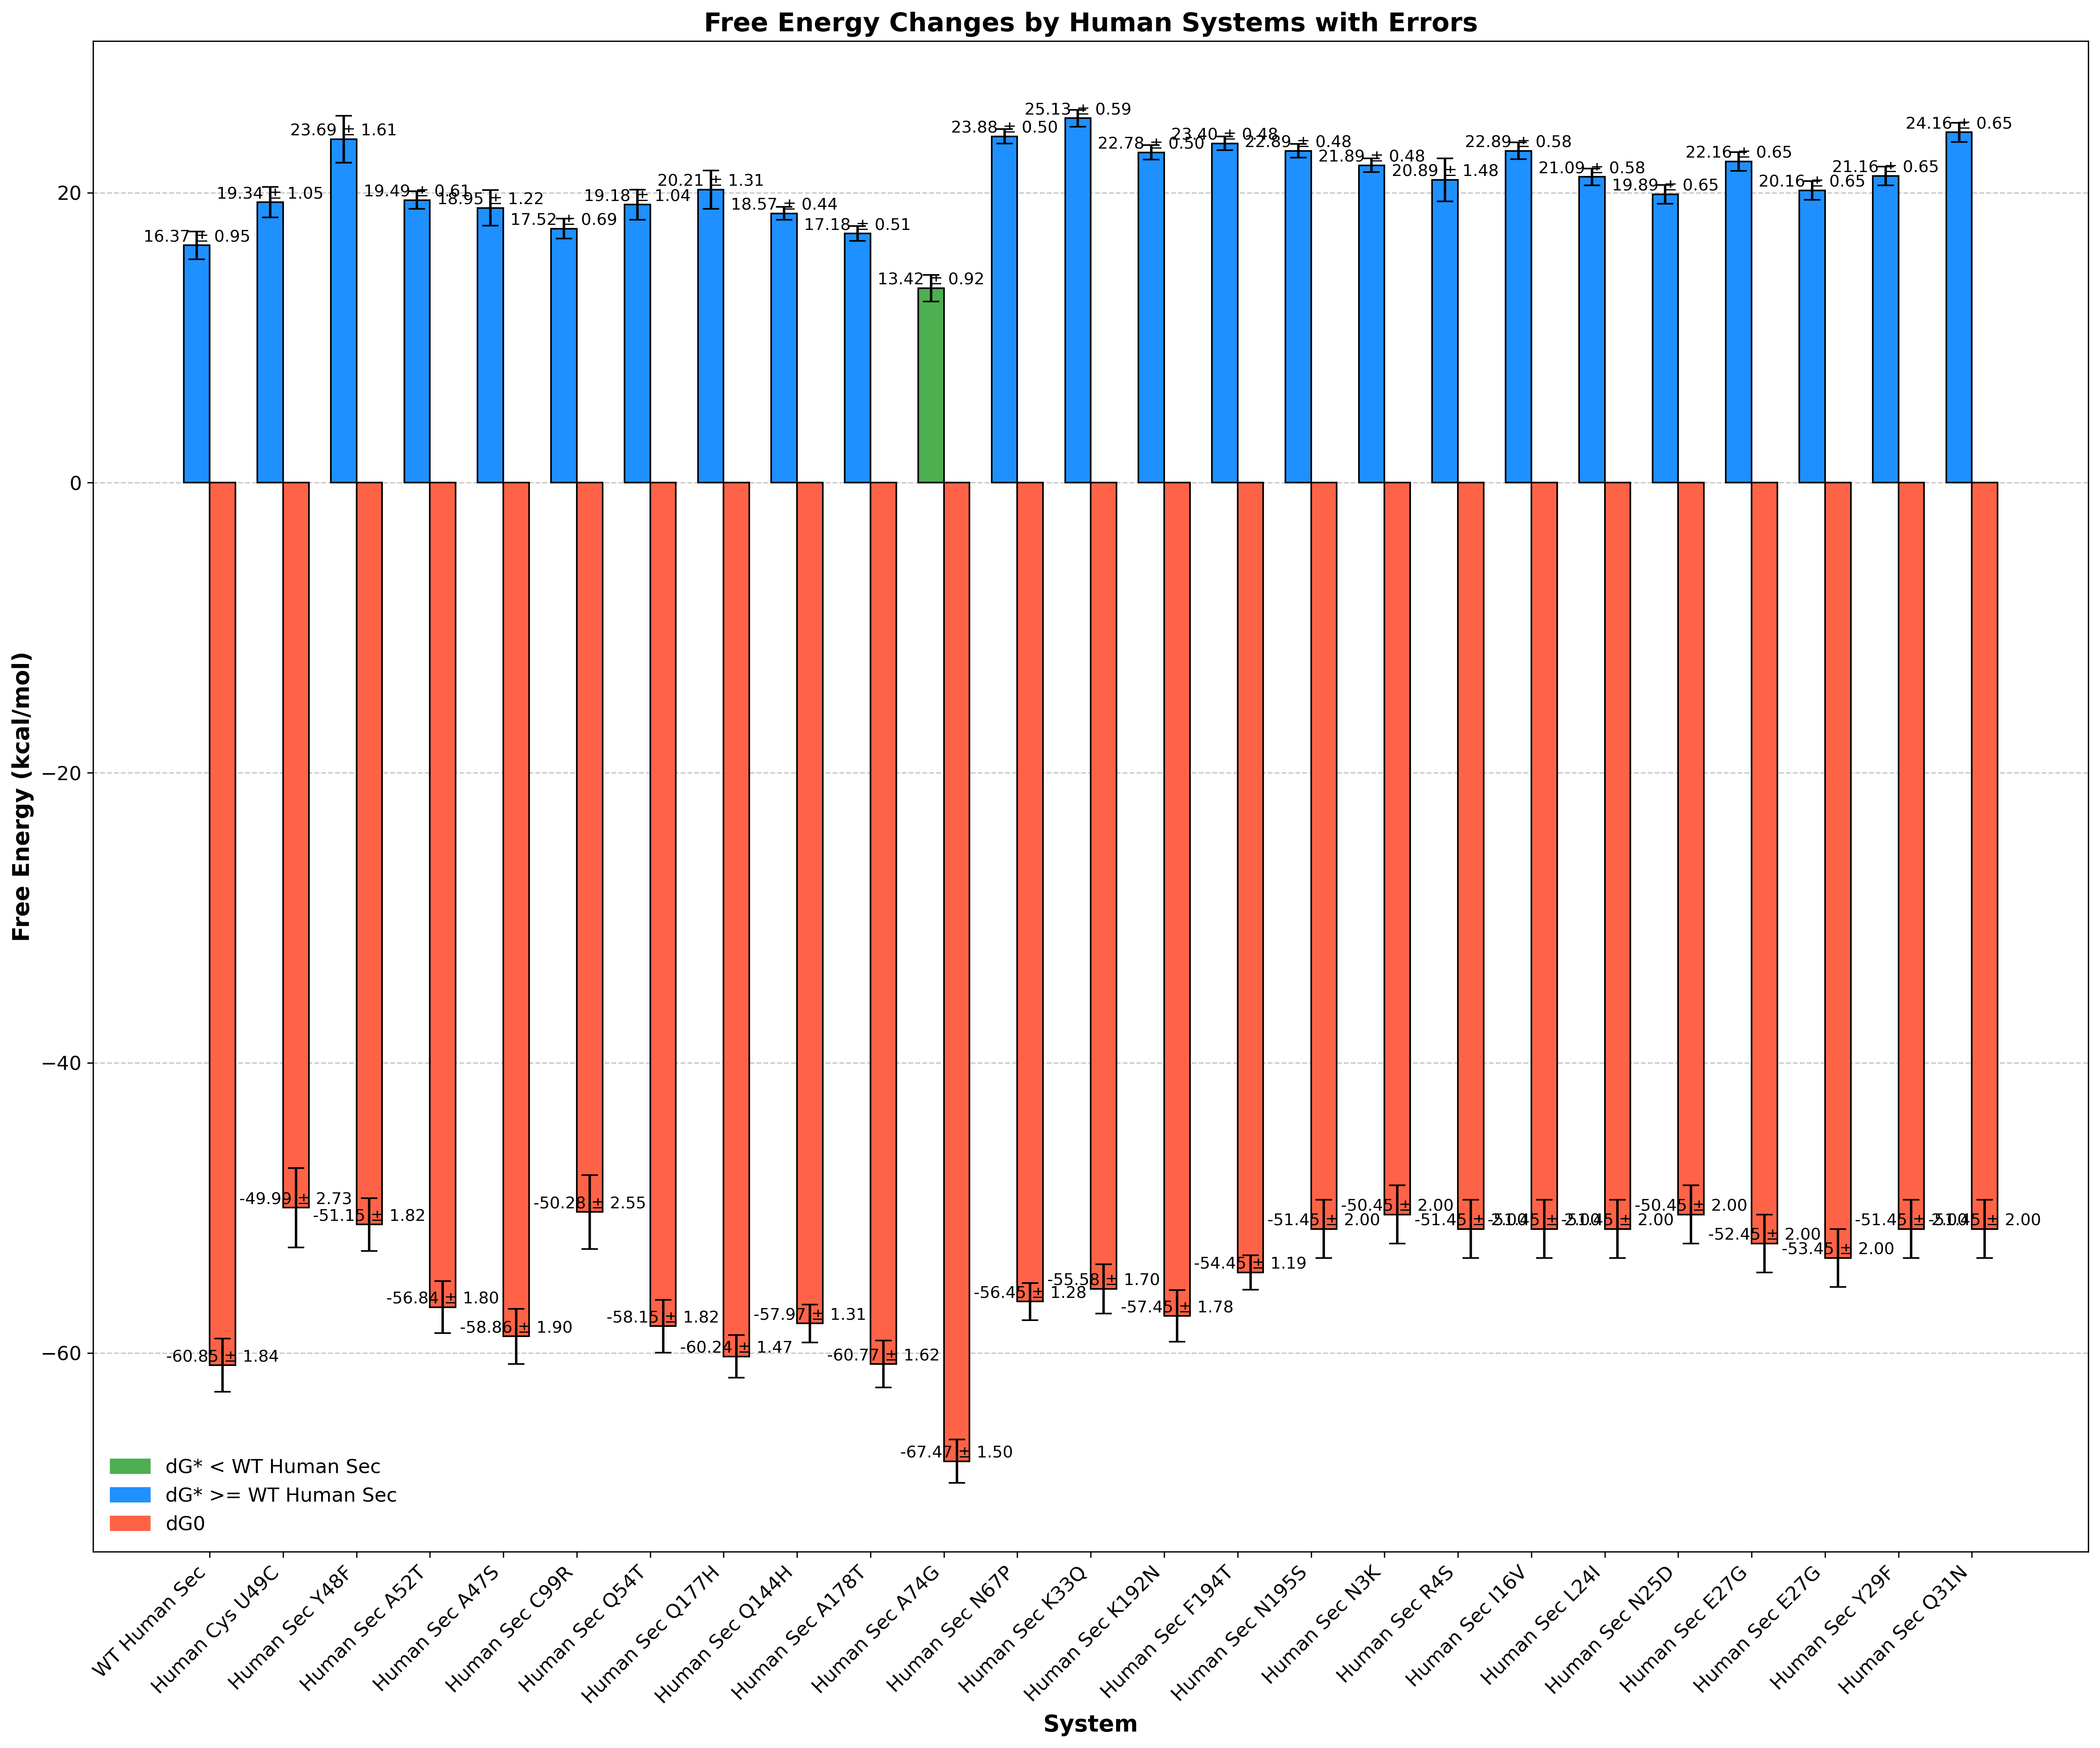

In [1]:
import re
import matplotlib.pyplot as plt
import numpy as np

# File path to the Free_Energy.tex file and save directory
file_path = '/home/hp/nayanika/github/GPX6/table/Free_Energy.tex'
save_path = '/home/hp/nayanika/github/GPX6/figures/Free_Energy_BarPlot_with_Errors_Human.png'

# Regular expression to capture the data from the table, including errors
regex = re.compile(r'([A-Za-z0-9,\s\-]+) & ([0-9.]+)\s?\\pm\s?([0-9.]+) kcal/mol & ([0-9.\-]+)\s?\\pm\s?([0-9.]+) kcal/mol')

# Lists to store the extracted data
systems = []
dg_star_values = []
dg_star_errors = []
dg_zero_values = []
dg_zero_errors = []

# Read the .tex file and extract data
with open(file_path, 'r') as f:
    for line in f:
        match = regex.search(line)
        if match:
            system_name = match.group(1).strip()
            if "Human" in system_name:  # Filter for Human entries
                systems.append(system_name)
                dg_star_values.append(float(match.group(2).strip()))
                dg_star_errors.append(float(match.group(3).strip()))
                dg_zero_values.append(float(match.group(4).strip()))
                dg_zero_errors.append(float(match.group(5).strip()))

# Ensure 'WT Human Sec' is found in the list
wt_mouse_cys_dg_star = None
for i, system in enumerate(systems):
    if "WT Human Sec" in system:
        wt_mouse_cys_dg_star = dg_star_values[i]
        break

if wt_mouse_cys_dg_star is None:
    raise ValueError("WT Human Sec dG* value not found in the table.")

# Threshold for low dG* values (set to WT-Human Sec dG* value)
low_dg_star_threshold = wt_mouse_cys_dg_star

# Plotting the data with error bars
x = np.arange(len(systems))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(18, 15), dpi=300)  

# Color scheme: using green for values lower than the threshold and blue for equal or higher values
bar_colors_dg_star = ['#4CAF50' if val < low_dg_star_threshold else '#1E90FF' for val in dg_star_values]  # Green for low, Blue for normal
bar_colors_dg_zero = ['#FF6347'] * len(dg_zero_values)  # Constant color for dG0 (Tomato)

# Bar plot for dG* and dG0 with error bars
bars1 = ax.bar(x - width/2, dg_star_values, width, label='Mean dG* (kcal/mol)', color=bar_colors_dg_star, edgecolor='black', yerr=dg_star_errors, capsize=5)
bars2 = ax.bar(x + width/2, dg_zero_values, width, label='Mean dG0 (kcal/mol)', color=bar_colors_dg_zero, edgecolor='black', yerr=dg_zero_errors, capsize=5)

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('System', fontsize=14, fontweight='bold')
ax.set_ylabel('Free Energy (kcal/mol)', fontsize=14, fontweight='bold')
ax.set_title('Free Energy Changes by Human Systems with Errors', fontsize=16, fontweight='bold')

# X-axis tick formatting
ax.set_xticks(x)
ax.set_xticklabels(systems, rotation=45, ha="right", fontsize=10, fontweight='medium')

# Adding custom labels to each bar with both mean and error values
for i, rect in enumerate(bars1):
    height = rect.get_height()
    label_color = 'black'  # Always black for better contrast
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{dg_star_values[i]:.2f} ± {dg_star_errors[i]:.2f}', 
            ha='center', va='bottom', fontsize=10, color=label_color)

for i, rect in enumerate(bars2):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{dg_zero_values[i]:.2f} ± {dg_zero_errors[i]:.2f}', 
            ha='center', va='bottom', fontsize=10, color='black')

# Custom legend with simplified text
handles = [
    plt.Rectangle((0, 0), 1, 1, color='#4CAF50', label='dG* < WT Human Sec'),
    plt.Rectangle((0, 0), 1, 1, color='#1E90FF', label='dG* >= WT Human Sec'),
    plt.Rectangle((0, 0), 1, 1, color='#FF6347', label='dG0')
]
ax.legend(handles=handles, fontsize=12, frameon=False)

# Improve grid visibility and style
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

# Increase the size of tick labels
ax.tick_params(axis='both', which='major', labelsize=12)

# Tight layout for saving
plt.tight_layout()

# Save the figure
plt.savefig(save_path, bbox_inches='tight', dpi=300)

# Show the plot (optional)
plt.show()
